In [ ]:
from openai import OpenAI
import numpy as np

In [ ]:
client = OpenAI(api_key= "<INSERT API KEY")








<!DOCTYPE html>
<html
  lang="en"
  
  data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"
  data-a11y-animated-images="system" data-a11y-link-underlines="true"
  
  >



  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">
  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>
  <link rel="preconnect" href="https://avatars.githubusercontent.com">

  
  <link rel="preload" href="https://github.githubassets.com/assets/mona-sans-d1bf285e9b9b.woff2" as="font" type="font/woff2" crossorigin>


  <link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/light-3e154969b9f9.css" /><link crossorigin="anonymous" media="all" rel="style
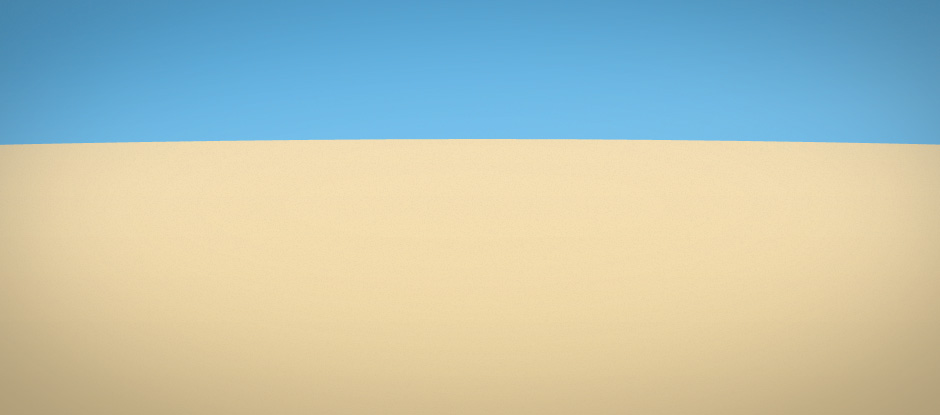
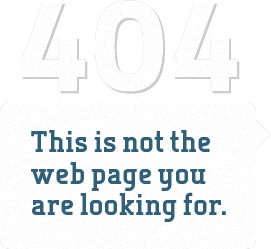
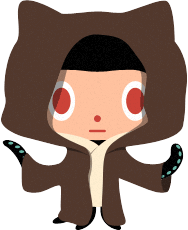
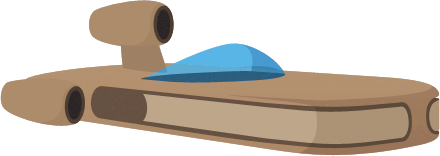
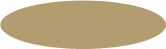
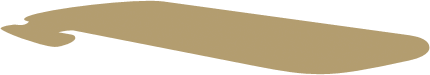
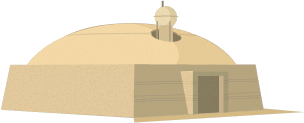
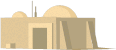

In [ ]:
with open('messi.txt', 'r') as f:
    text = f.read()
    print(text)

In [ ]:
CHUNK_SIZE = 100
chunks = []
current_place = 0
while current_place < len(text):
    current_chunk = text[current_place : current_place + CHUNK_SIZE]
    chunks.append(current_chunk)
    current_place += CHUNK_SIZE
print(chunks)

['\n\n\n\n\n\n\n<!DOCTYPE html>\n<html\n  lang="en"\n  \n  data-color-mode="auto" data-light-theme="light" data-d', 'ark-theme="dark"\n  data-a11y-animated-images="system" data-a11y-link-underlines="true"\n  \n  >\n\n\n\n  <', 'head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n', '  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" ', 'href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.g', 'ithubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>', '\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n  \n  <link rel="preload" hr', 'ef="https://github.githubassets.com/assets/mona-sans-d1bf285e9b9b.woff2" as="font" type="font/woff2"', ' crossorigin>\n\n\n  <link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.gi', 'thubassets.com/assets/light-3e1

In [ ]:
embedded_chunks = []
for chunk in chunks:
    response = client.embeddings.create(
        input=chunk,
        model="text-embedding-3-small"
    )
    embedded_chunks.append( (chunk, response.data[0].embedding) )
print(embedded_chunks)

NameError: name 'client' is not defined

In [ ]:
def cosine_simularity(A, B):
    return np.dot(A,B) / ( np.linalg.norm(A) * np.linalg.norm(B) )
   # -> ABcos/ A/|A| * B/|B|

In [ ]:
question = '"Who is the greatest soccer player of all time?"'

In [ ]:
question_embedding = client.embeddings.create(
        input=question,
        model="text-embedding-3-small"
    ).data[0].embedding
print(question_embedding)

In [ ]:
best_cosine_similarity = 0
index = 0
for i in range(len(embedded_chunks)):
    similarity = cosine_simularity(question_embedding, embedded_chunks[i][1])
    if similarity > best_cosine_similarity:
        best_cosine_similarity = similarity
        index = i

In [ ]:
print(f"Relevant information: {embedded_chunks[index][0]}")

completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {
            "role": "user", "content": f"User question: {question}. Potentially useful information: {embedded_chunks[index][0]}"
        }
    ]
)

In [ ]:
print(completion.choices[0].message.content)